In [ ]:
#Importamos las librerias que utilizaremos.
import pandas as pd
import numpy as np
import os, glob, errno
from os import listdir,makedirs
from os.path import isfile,join
%matplotlib inline
import matplotlib.pyplot as plt
import glob
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array 
import cv2
import PIL
from PIL import Image
import cv2

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path to the datasets
path = "/content/drive/MyDrive/AI_HACKATHON/DATOS_IMAGENES/data"

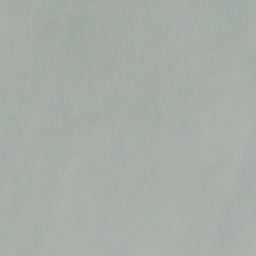

In [ ]:
# Print the images in RGB
image = PIL.Image.open(path +"/cloudy/train_10043.jpg")
image.convert('RGB')

In [ ]:
# We print the categories that reads our path. Categories are arrange in alphanumeric order
print(os.listdir(path))

['cloudy', 'desert', 'water', 'green_area']


In [ ]:
# We print the number of data per category
print(len(os.listdir(path +'/cloudy')))
print(len(os.listdir(path +'/desert')))
print(len(os.listdir(path +'/green_area')))
print(len(os.listdir(path +'/water')))

1500
1131
1500
1501


In [ ]:
# We convert the RGBA images in cloudy and substitute them with RGB images.
path_cloudy = path + "/cloudy"
# Replace mydir with the directory you want
mydir = '/content/drive/MyDrive/AI_HACKATHON/DATOS_IMAGENES/data/cloudy_rgwqb'

#check if directory exist, if not create it
try:
    os.makedirs(mydir)
except OSError as e:
    if e.errno == errno.EEXIST:
        raise
for fil in glob.glob(path_cloudy + "/*.jpg"):
    image = cv2.imread(fil) 
   # rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # convert to greyscale
    cv2.imwrite(os.path.join(mydir,fil),image) # write to location with same name

In [ ]:
# We explore the shape of the image in the dataset and check all the images are RGB
np.asarray(PIL.Image.open(path +"/green_area/Forest_163.jpg")).shape

(64, 64, 3)

In [ ]:
np.asarray(PIL.Image.open(path +"/cloudy/train_10043.jpg")).shape

(256, 256, 3)

In [ ]:
np.asarray(PIL.Image.open(path +"/desert/desert(1004).jpg")).shape

(256, 256, 3)

In [ ]:
# Read the data and putting it in a batch
datatotal = tf.keras.utils.image_dataset_from_directory(
    path,
    labels="inferred",
    label_mode="int",
    class_names=['cloudy', 'desert', 'water', 'green_area'],
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 5632 files belonging to 4 classes.


In [ ]:
# Separate the batchdataset in images and labels from the tuple
images, labels = tuple(zip(*datatotal))

In [ ]:
# Convert into numpy arrays
images = np.array(images)
labels = np.array(labels)

In [ ]:
# Print labels and images 
labels[0,1]
# images[0,1]

0

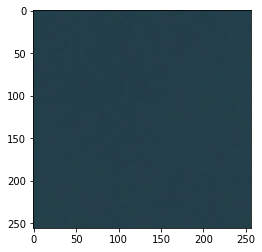

In [ ]:
# Print an image from the numpy array using matplotlib.
imageprueba2 = images[6,1]/255
plt.imshow(imageprueba2)
plt.show()

In [3]:
!pwd 

/content


In [6]:
!jupyter nbconvert --to html '/content/drive/MyDrive/AI_HACKATHON/DATOS_IMAGENES/Data_preprocessing.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/AI_HACKATHON/DATOS_IMAGENES/Data_preprocessing.ipynb to html
[NbConvertApp] Writing 360659 bytes to /content/drive/MyDrive/AI_HACKATHON/DATOS_IMAGENES/Data_preprocessing.html
